In [202]:
import tensorflow.compat.v1 as tf 
from tensorflow.compat.v1.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
import numpy as np

from tensorflow.python.client import device_lib

from tensorflow.compat.v1.keras.preprocessing import image

from tensorflow.compat.v1.keras.optimizers import Adam

In [11]:
def test_amd_gpu():
    tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 
    print(tf.add([1.0, 2.0], [3.0, 4.0])) # Create two tensors for gpu test.

In [12]:
test_amd_gpu()

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


In [13]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [14]:
print(get_available_devices()) # Return a list of devices we can use in the notbook.

['/device:CPU:0', '/device:DML:0']


In [15]:
tf.__version__

'1.15.5'

In [19]:
"""Generating a random number to visualize the images"""

rand = random.randint(1, 100)

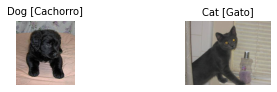

In [20]:
"""Visualizing images that we are going to work on"""

plt.subplot(3, 2, 1) # Define subplot 1 with dimension (3, 2) and pos 1.
plt.title('Dog [Cachorro]', fontsize=10)
plt.imshow(
    mpimg.imread('training_set/dogs/dog.{rand}.jpg'.format(rand=rand))
    # Importing dog images.
)
plt.axis('off') # Disabling axis from subplot 1.
plt.subplot(3, 2, 2) # Define subplot 2 with dimension (3, 2) and pos 2.
plt.title('Cat [Gato]', fontsize=10)
plt.imshow(
    mpimg.imread('training_set/cats/cat.{rand}.jpg'.format(rand=rand))
    # Importing cat images.
)
plt.axis('off') # Disabling axis from subplot 2.
plt.show()

In [21]:
"""Visualizing image shape and color depth"""

print('Image shape:', (mpimg.imread(
    'training_set/dogs/dog.{rand}.jpg'.format(rand=rand)).shape),
      
    'Color Depth:', mpimg.imread(
    'training_set/dogs/dog.{rand}.jpg'.format(rand=rand)).max()
)

Image shape: (218, 199, 3) Color Depth: 255


In [207]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Appling feature scaling.
    shear_range=0.2, # Shear transformation.
    zoom_range=0.2, # Zoom transformation.
    horizontal_flip=True # Flipping image transformation.
)

In [208]:
train_dataPath = 'training_set/'

In [209]:
train_generator = train_datagen.flow_from_directory(
    train_dataPath, # Get training directory.
    target_size=(32, 32), # Resize target_size to train by 32x32.
    batch_size=16, # Set 16 training samples.
    class_mode='binary' # Binary for two classes, cats and dogs.
)

Found 8000 images belonging to 2 classes.


In [210]:
test_datagen = ImageDataGenerator(rescale=1./255) # Appling feature scaling.

In [211]:
test_dataPath = 'test_set/'

In [212]:
test_generator = test_datagen.flow_from_directory(
    test_dataPath, # Get testing directory.
    target_size=(32, 32), # Resize target_size to test by 32x32.
    batch_size=16, # Set 16 training samples.
    class_mode='binary' # Binary for two classes, cats and dogs.
)

Found 2000 images belonging to 2 classes.


In [213]:
model = tf.keras.models.Sequential() # Inicializing Sequential model.

In [214]:
model.add(
    tf.keras.layers.Conv2D(
        filters=16, # Number of ouput filters in the convolution.
        kernel_size=3, # Height and Width of the 2D convolution window.
        activation='relu', # Activation function, set as relu.
        input_shape=(32, 32, 3) # Desired input shape, matching target_size.
    )
)

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2, # Pooling window size. In this case (2, 2).
        strides=2 # Move distance for each pool step.
    )
)

model.add(
    tf.keras.layers.Conv2D(
        filters=16, # Number of ouput filters in the convolution.
        kernel_size=3, # Height and Width of the 2D convolution window.
        activation='relu' # Activation function, set as relu.
    )
)

model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=2, # Pooling window size. In this case (2, 2).
        strides=2 # Move distance for each pool step.
    )
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0


In [215]:
model.add(
    tf.keras.layers.Flatten() # Flattens the input.
)

In [216]:
model.add(
    tf.keras.layers.Dense(
        units=64, # Output space dimension.
        activation='relu'# Activation function, set as relu.
    )
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0


In [217]:
model.add(
    tf.keras.layers.Dense(
        units=1, # Output space dimension.
        activation='sigmoid' # Activation function, set as sigmoid.
    )
)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0


In [218]:
model.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [219]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                36928     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

In [220]:
model.fit_generator(
    generator=train_generator,
    validation_data=test_generator,
    epochs=25
)

Epoch 1/25
Executing op Sigmoid in device /job:localhost/replica:0/task:0/device:DML:0
Executing op SigmoidGrad in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:DML:0
500/500 [==============================] - 172s 345ms/step - loss: 0.6802 - acc: 0.5651 - val_loss: 0.6615 - val_acc: 0.5975
Epoch 2/25
500/500 [==============================] - 98s 195ms/step - loss: 0.6420 - acc: 0.6283 - val_loss: 0.6144 - val_acc: 0.6750
Epoch 3/25
500/500 [==============================] - 25s 51ms/step - loss: 0.6073 - acc: 0.6

In [223]:
model.save('CNN-model-76Acc.h5')

Executing op Identity in device /job:localhost/replica:0/task:0/device:DML:0


In [224]:
img = image.load_img('single_prediction/cat_or_dog_1.jpg', 
                     target_size=(32, 32))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

(-0.5, 959.5, 719.5, -0.5)

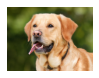

In [231]:
plt.subplot(3, 2, 1) # Define subplot 1 with dimension (3, 2) and pos 1.
plt.imshow(
    mpimg.imread('single_prediction/cat_or_dog_1.jpg')
    # Importing dog images.
)
plt.axis('off') # Disabling axis from subplot 1.

In [ ]:
prediction = model.predict(img)

In [233]:
train_generator.class_indices

print('Dog [Cachorro]') if prediction[0][0] > 0.5 else print('Gato [Cat]')

Dog [Cachorro]
